In [1]:
1 + 1

2

In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import imp
import my_tools
imp.reload(my_tools)

<module 'my_tools' from '/home/ubuntu/thesis_work/my_tools.py'>

In [25]:
from my_tools import *

In [26]:
# Q_MINCOIN
MNC = CoinDataMgr(blocksci_path="/home/ubuntu/mincoin",
                  path_to_clusters="/home/ubuntu/~/clusters2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks",
                  max_block=800000)

Got 800000 blocks
Got 90517 clusters


In [27]:
MNC[S_GINIS].readAll()
MNC[S_REL_FLOWS].readAll()
MNC[S_FEES].readAll()
MNC[S_NCS].readAll()
MNC[S_UNSPENTS].readAll()
MNC[S_NONEMPTY_CLS].readAll()
MNC[S_CLS_CNTS].readAll()
MNC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_usingNpMap.json', key is 'usingNpMap'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_unspents'...
  Got 'int1000b_unspents_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'i

In [23]:
tag_m = MNC.gatherAllMetrics({S_NCS:'', S_GINIS:'usingNpMap', S_REL_FLOWS:'par', S_FEES:'par',
                                   S_NONEMPTY_CLS:'par', S_UNSPENTS:'par', S_CLS_CNTS: 'usingNpMap'})
tag_filtered_m = MNC.rollingMeanAllMetrics(allMetrics_tag=tag_m, common_win=5)

Gathered under tag 'nonEmptyClustersCounts=par_unspents=par_NacamotoCoefs=_relativeFlowVolumes=par_activeClustersCounts=usingNpMap_ginisOfClustersWealth=usingNpMap_fees=par'


/home/ubuntu/thesis_work/my_tools.py:811: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


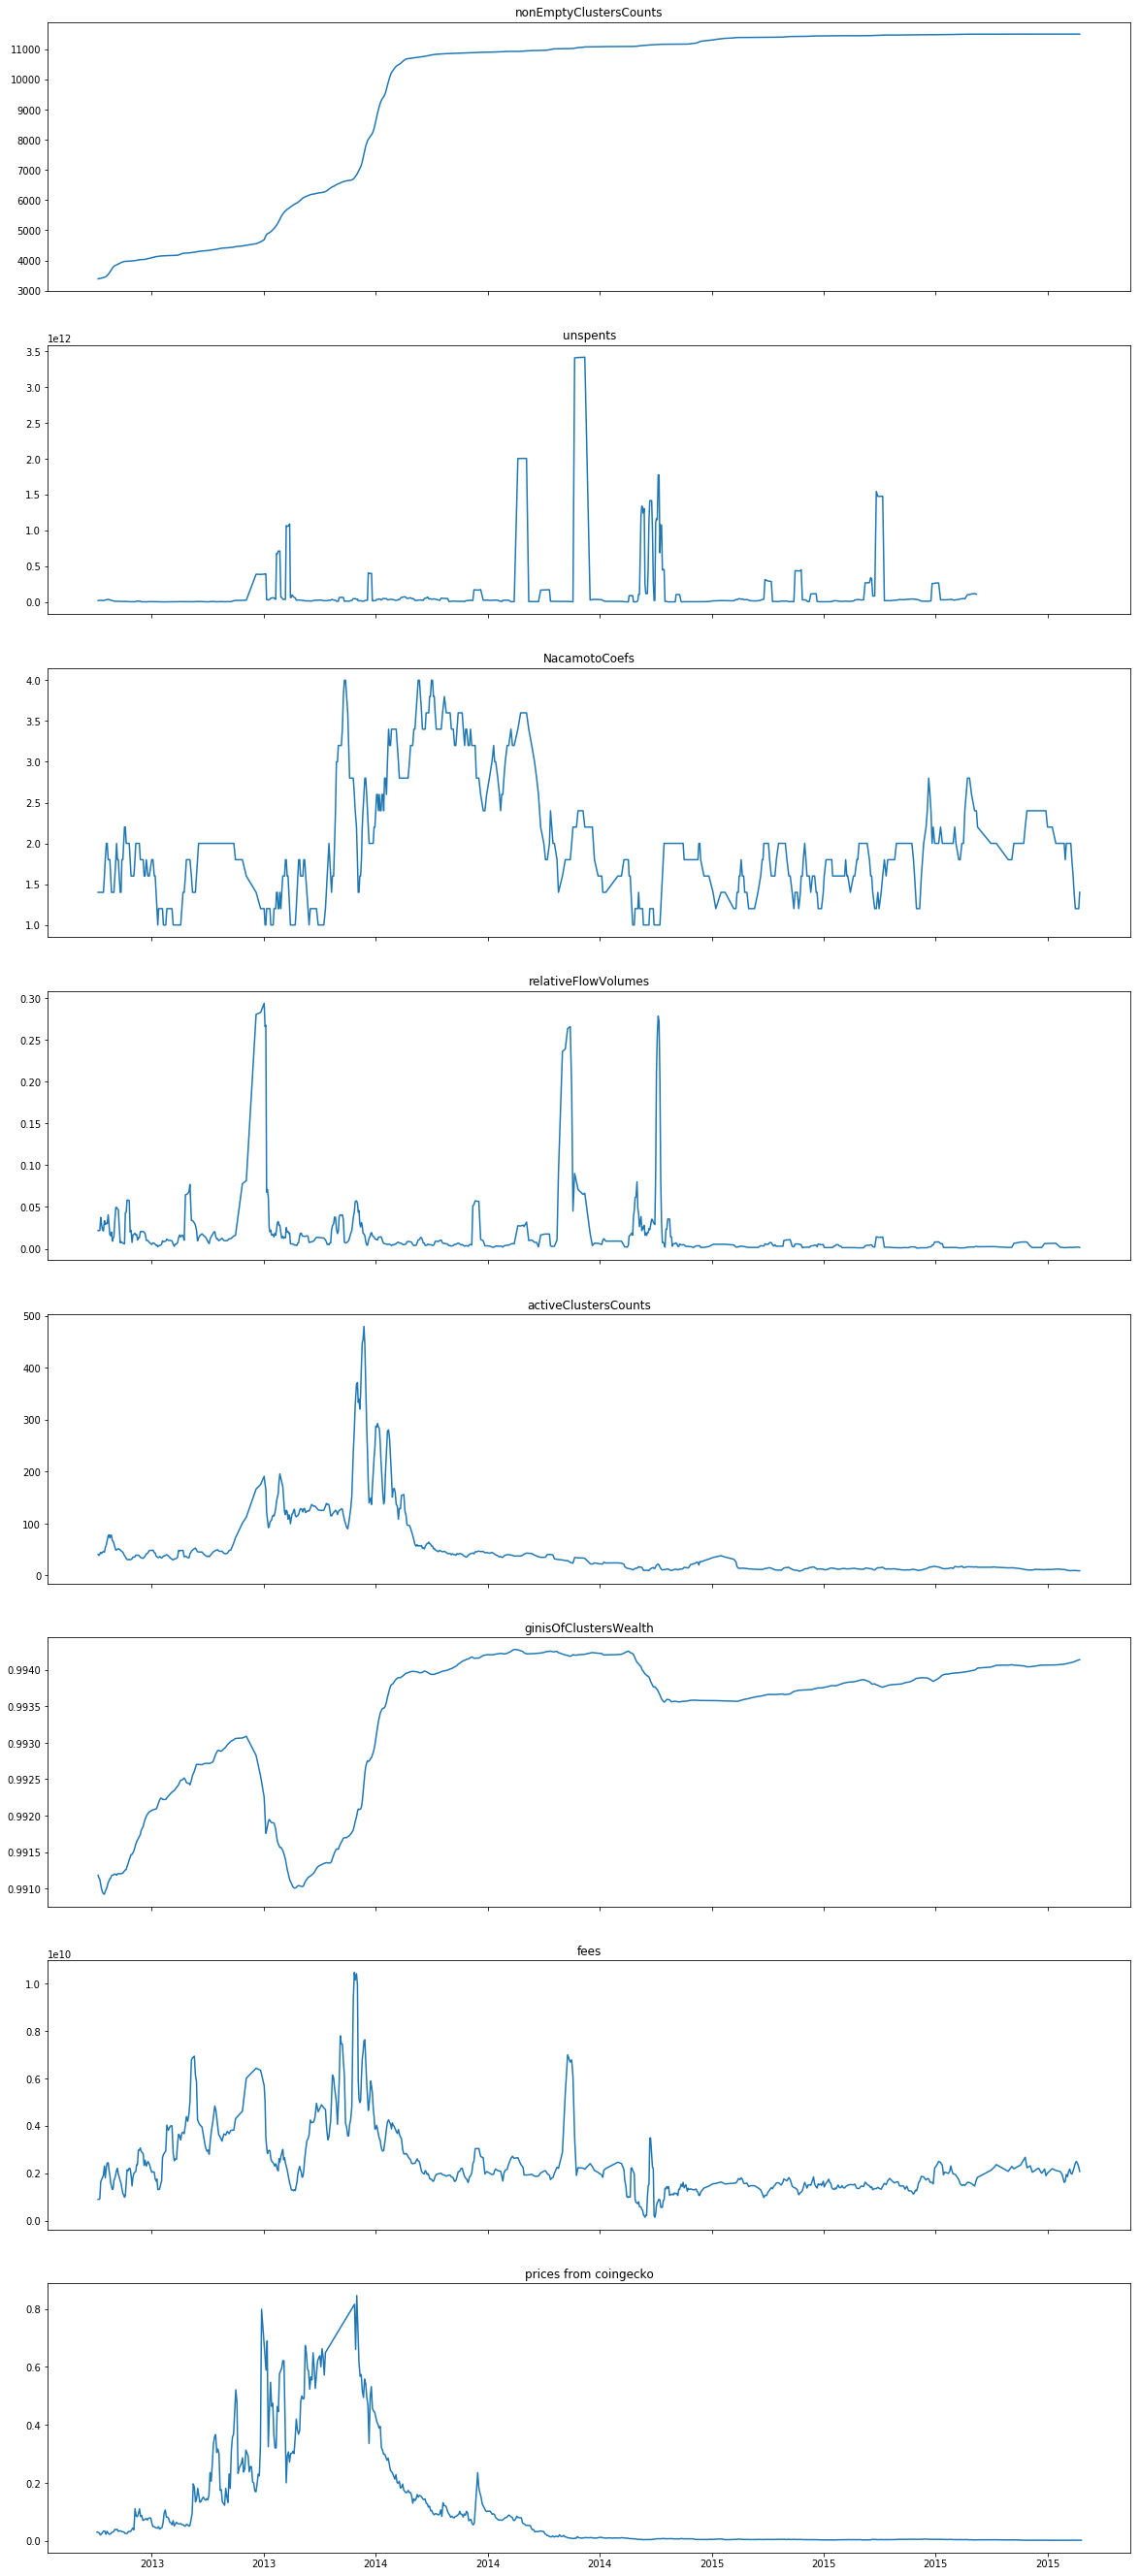

In [28]:
_m = MNC.drawGraph(allMetrics_tag=tag_filtered_m, begin=110, prices_key='coingecko')

In [27]:
_m.savefig('mincoin800k_all_metrics_meanWnd5.png')

In [29]:
_m.savefig('mincoin110kTo800k_all_metrics_meanWnd5.png')

In [ ]:
tag_filtered_m

In [26]:
MNC.allMetrics.save(tag_filtered_m, check=False)

Saving "nonEmptyClustersCounts=par_unspents=par_NacamotoCoefs=_relativeFlowVolumes=par_activeClustersCounts=usingNpMap_ginisOfClustersWealth=usingNpMap_fees=par_rolledMeanComWnd=5" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_allMetrics_nonEmptyClustersCounts=par_unspents=par_NacamotoCoefs=_relativeFlowVolumes=par_activeClustersCounts=usingNpMap_ginisOfClustersWealth=usingNpMap_fees=par_rolledMeanComWnd=5" file


In [4]:
# Q_N
MNC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [10]:
%time balance_flow_txcnt_deltas =\
getClustersBalanceFlowTxCountChangeDictBlocksPar(MNC.chain, len(MNC.blocks), MNC[S_MAP_A2C]['np'])

CPU times: user 17.6 s, sys: 548 ms, total: 18.2 s
Wall time: 29 s


In [11]:
balance_flow_txcnt_deltas_list = list(balance_flow_txcnt_deltas.items())

In [12]:
balance_flow_txcnt_deltas_list[3]

(3, array([0, 0, 0]))

In [13]:
bft_deltas_sorted = sorted(balance_flow_txcnt_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

In [15]:
bft_deltas_sorted[-10:]

[(22185, array([             0, 67553496736302,              4])),
 (9728, array([      30000000, 78379345345726,             91])),
 (22007, array([     100000000, 88429100000000,             17])),
 (21707, array([              0, 118497298147224,               6])),
 (22196, array([              0, 139953419013582,              10])),
 (22008, array([              0, 175871000000000,              38])),
 (2341, array([       22033260, 178797597773576,            1812])),
 (4228, array([ 95648401582384, 618558279882450,          806098])),
 (3986, array([       90000000, 636734850000000,              39])),
 (3500, array([     5497981909, 896490534954993,           40435]))]

In [ ]:
sort()

In [5]:
MNC.getNonEmptyClustersCounts()

Work time 17.51s


In [6]:
MNC[S_NONEMPTY_CLS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_nonEmptyClustersCounts_par" file


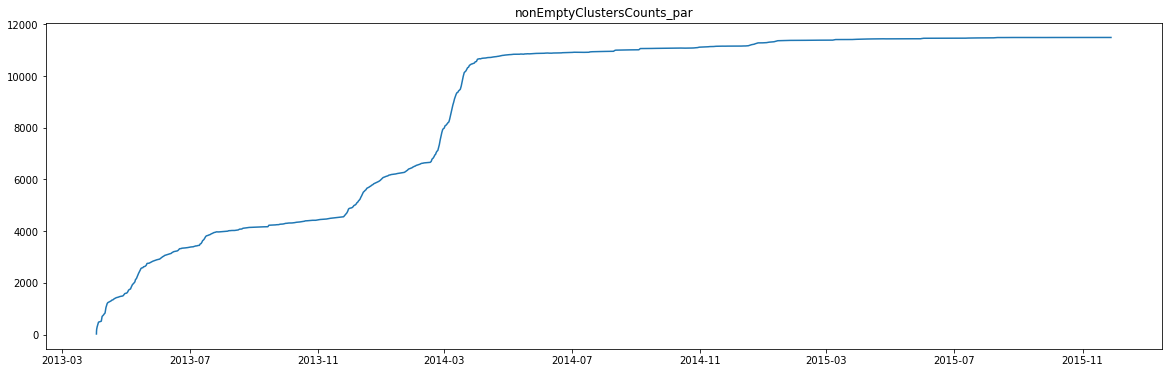

In [279]:
_ = MNC.drawGraph({S_NONEMPTY_CLS: 'par'})

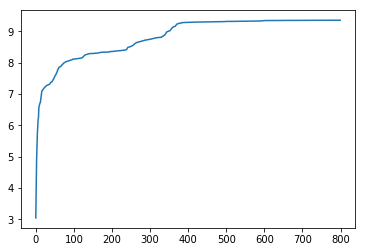

In [283]:
plt.plot(np.log(np.array(MNC[S_NONEMPTY_CLS]['par'])))

In [245]:
begin, end = 999999, 1000000

In [246]:
cluster_balances_1 = np.zeros(len(MNC.cl_mgr.clusters()))
cluster_balances_2 = np.zeros(len(MNC.cl_mgr.clusters()))
cluster_balances_3 = np.zeros(len(MNC.cl_mgr.clusters()))

In [247]:
%time cluster_balances_1, _ = getClustersBalanceChangeBlocksNp2(MNC.blocks[begin:end], MNC[S_MAP_A2C]['np'], cluster_balances_1)

Et ya2!
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 229 µs


In [248]:
np.nonzero(cluster_balances_1)

(array([], dtype=int64),)

In [243]:
%time cluster_balances_3 = getClustersBalanceChangeBlocksNonPar(MNC.chain, begin, end, MNC[S_MAP_A2C]['np'], cluster_balances_3)

CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.2 s


In [236]:
np.nonzero(cluster_balances_1)

(array([], dtype=int64),)

In [244]:
(cluster_balances_1 == cluster_balances_3).all()

True

In [237]:
MNC.chain[100000].output_value

200000000

In [228]:
cluster_balances_1[cluster_balances_1 != cluster_balances_3]

array([ 0.])

In [220]:
cluster_balances_3[cluster_balances_1 != cluster_balances_3]

array([  2.00000000e+08])

In [207]:
(cluster_balances_2 == cluster_balances_3).all()

True

In [206]:
%time cluster_balances_2 = getClustersBalanceChangeBlocksPar(MNC.chain, begin, end, MNC[S_MAP_A2C]['np'], cluster_balances_2)

CPU times: user 264 ms, sys: 272 ms, total: 536 ms
Wall time: 738 ms


In [ ]:
len(cluster_balances_1[cluster_balances_1 != cluster_balances_2])

In [ ]:
getClustersBalanceChangeByGroupsPar()

In [ ]:
# Q_CALCULATION

In [161]:
MNC.getMapAddress2Cluster()

Work time 12.14s


In [163]:
MNC[S_MAP_A2C].save('np', check=False)

Saving "np" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_map_address2cluster_np" file


In [164]:
MNC.getGinis()

90516
Work time 34.76s


In [166]:
MNC[S_GINIS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_ginisOfClustersWealth_usingNpMap" file


In [172]:
MNC.guessMiners()

Work time 9.05s


In [173]:
MNC.getNCs()

Work time 1.13s


In [174]:
MNC[S_NCS].save('')

Saving "" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_NacamotoCoefs" file


In [175]:
MNC.getFees()

Work time 1.19s


In [177]:
MNC[S_FEES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_fees_par" file


In [178]:
MNC.getUnspents()

Work time 3.23s


In [179]:
MNC[S_UNSPENTS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_unspents_par" file


In [187]:
MNC.getFlowAndIncomeVolume()

Work time 9.88s


In [185]:
len(MNC[S_FLOWS_INCOMES]['par']['flows'])

800

In [189]:
MNC[S_FLOWS_INCOMES].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_flowAndIncomeVolumes_par" file


In [190]:
MNC.getRelativeFlowVolumes()

Work time 0.0s


In [191]:
MNC[S_REL_FLOWS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_relativeFlowVolumes_par" file


In [199]:
MNC.getActiveAddressesCounts()

Work time 24.18s


In [201]:
MNC[S_ADDS_CNTS].save('')

Saving "" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_activeAddressesCounts" file


In [202]:
MNC.getActiveClustersCounts()

Work time 26.09s


In [203]:
MNC[S_CLS_CNTS].save('usingNpMap')

Saving "usingNpMap" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_activeClustersCounts_usingNpMap" file


In [12]:
prices_m_df = pd.read_csv('~/thesis_work/downloaded/mnc-usd-max.csv')
prices_m_df[:3]

,snapped_at,price,market_cap,total_volume
0,2013-05-03 00:00:00 UTC,0.099005,100528.0,0.0
1,2013-05-04 00:00:00 UTC,0.193906,197809.0,0.0
2,2013-05-05 00:00:00 UTC,0.118000,120599.0,0.0


In [13]:
prices_b_df_to_save_dict = {'times': pd.to_datetime(prices_m_df['snapped_at']),
                            'prices': prices_m_df['price']}

In [14]:
prices_b_df_to_save = pd.DataFrame(prices_b_df_to_save_dict)

In [17]:
MNC.prices.add('coingecko', prices_b_df_to_save)

In [20]:
MNC.prices.save('coingecko', check=False)

Saving "coingecko" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_prices_coingecko" file


In [21]:
del MNC.prices.v['coingecko']

In [22]:
MNC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


In [6]:
# Q_EXCHANGE_ADDS
start_time = time.time()
grouped_balance_flow_txcnt_deltas = []
group_size = 100000
groups_count = (len(MNC.blocks) - 1) // group_size + 1
for i in range(groups_count):
    balance_flow_txcnt_deltas = getAddressesBalanceFlowTxCountChangeDictBlocksPar(MNC.chain,
                                                                                  start=group_size*i,
                                                                                  end=group_size*(i+1))
    grouped_balance_flow_txcnt_deltas.append(balance_flow_txcnt_deltas)
    print('{}%'.format(100 * i / groups_count))
print(time.time() - start_time)

0.0%
12.5%
25.0%
37.5%
50.0%
62.5%
75.0%
87.5%
37.97672963142395


In [7]:
%time adds_balance_flow_txcnt_deltas = sumClusterDicts(grouped_balance_flow_txcnt_deltas)

CPU times: user 676 ms, sys: 8 ms, total: 684 ms
Wall time: 681 ms


In [8]:
adds_BFT_deltas_list = list(adds_balance_flow_txcnt_deltas.items())

In [9]:
%time BFT_deltas_sorted_120 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][1], pair[1][2], pair[1][0]))

CPU times: user 620 ms, sys: 16 ms, total: 636 ms
Wall time: 636 ms


In [11]:
%time BFT_deltas_sorted_210 = sorted(adds_BFT_deltas_list, key=lambda pair: (pair[1][2], pair[1][1], pair[1][0]))

CPU times: user 784 ms, sys: 16 ms, total: 800 ms
Wall time: 799 ms


In [13]:
BFT_deltas_sorted_210[-10:]

[(1764282, array([  19928000763, 7705344002089,         39156])),
 (1293632, array([  50221422847, 9806640268841,         44432])),
 (1682252, array([ 387693417095, 8299480250757,         44946])),
 (415282, array([   79382014012, 12014146040404,          61567])),
 (1586742, array([   66874964116, 12683824891274,          65577])),
 (2497711, array([   39940010221, 19207820029951,          97398])),
 (416192, array([   55332493979, 23122397480405,         117354])),
 (1031342, array([  303449461228, 24972748378032,         133872])),
 (2542472, array([  813751052635, 27561493154759,         140683])),
 (2467022, array([  125501000160, 35084503002032,         174741]))]

In [22]:
MNC.getNonEmptyAddressesCounts('par')

Work time 47.6s


In [24]:
MNC[S_NONEMPTY_CLS].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_nonEmptyClustersCounts'...
  Got 'int1000b_nonEmptyClustersCounts_par.json', key is 'par'
Finish


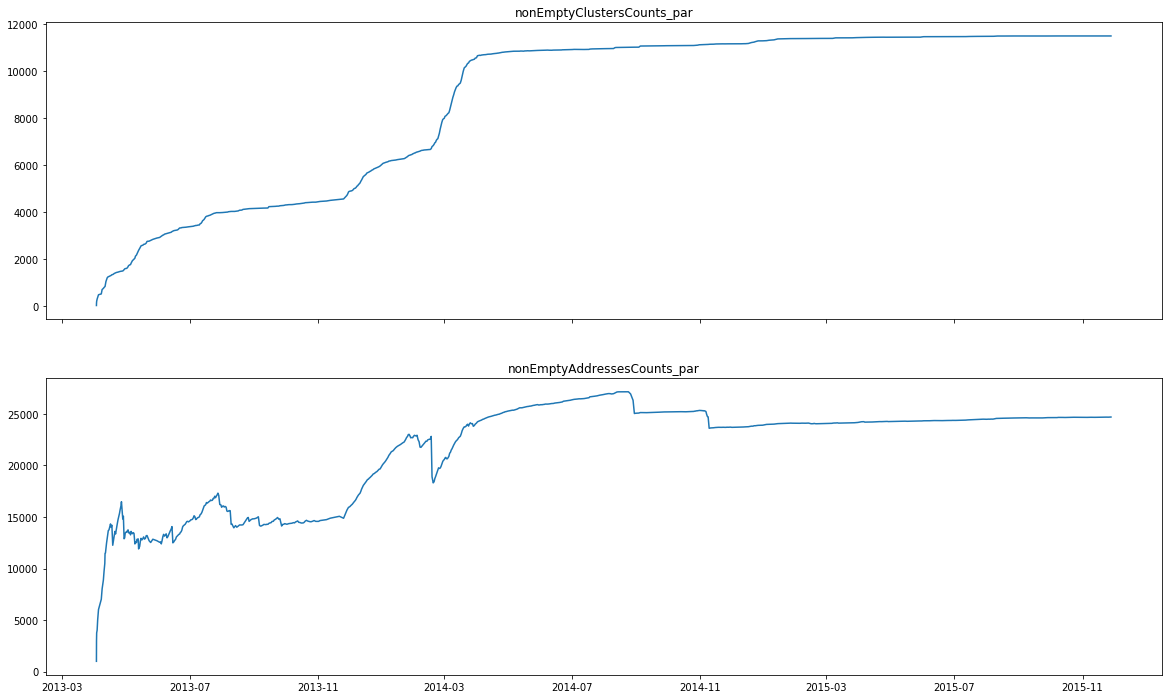

In [25]:
_ = MNC.drawGraph({S_NONEMPTY_ADDS: 'par', S_NONEMPTY_CLS: 'par'})

In [26]:
MNC[S_NONEMPTY_ADDS].save('par')

Saving "par" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_nonEmptyAddressesCounts_par" file


In [8]:
map_addtype2num[3]

address_type.multisig_pubkey

In [11]:
map_addtype2num[blocksci.address_type.multisig_pubkey]

address_type.multisig_pubkey

In [10]:
map_addtype2num = {}
addtype_num = 0
for add_type in blocksci.address_type.types:
    map_addtype2num[add_type] = addtype_num
    map_addtype2num[addtype_num] = add_type
    addtype_num += 1

In [15]:
map_addtype2num.items()

dict_items([(address_type.nonstandard, address_type.nonstandard), (address_type.pubkey, 'huy'), (address_type.pubkeyhash, address_type.pubkeyhash), (address_type.multisig_pubkey, address_type.multisig_pubkey), (address_type.scripthash, address_type.scripthash), (address_type.multisig, address_type.multisig), (address_type.nulldata, address_type.nulldata), (address_type.witness_pubkeyhash, address_type.witness_pubkeyhash), (address_type.witness_scripthash, address_type.witness_scripthash)])

In [13]:
map_addtype2num[1] = 'huy'

In [16]:
hash(blocksci.address_type.multisig_pubkey)

3

In [17]:
hash(3)

3

In [19]:
hash(blocksci.address_type.witness_scripthash)

8

In [31]:
# Q_AllAH
MNC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [32]:
MNC.getNonEmptyAddressesCounts(key='par', clusters_2b_ignored=set([1]))

Exception ignored in: <finalize object at 0x7f20c97296f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", line 465, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.5/shutil.py", line 463, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpwjrbxtve'
Exception ignored in: <finalize object at 0x7f20c97296f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.5/weakref.py", line 519, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
Exception ignored in: <finalize object at 0x7f20c97296f0; dead>
  File "/usr/lib/python3.5/tempfile.py", line 936, in _cleanup
Traceback (most recent call last):
    _rmtree(name)
  File "/usr/lib/python3.5/shutil.py", 

OHUENNA!
100 groups are done
200 groups are done
300 groups are done
400 groups are done


KeyboardInterrupt: 

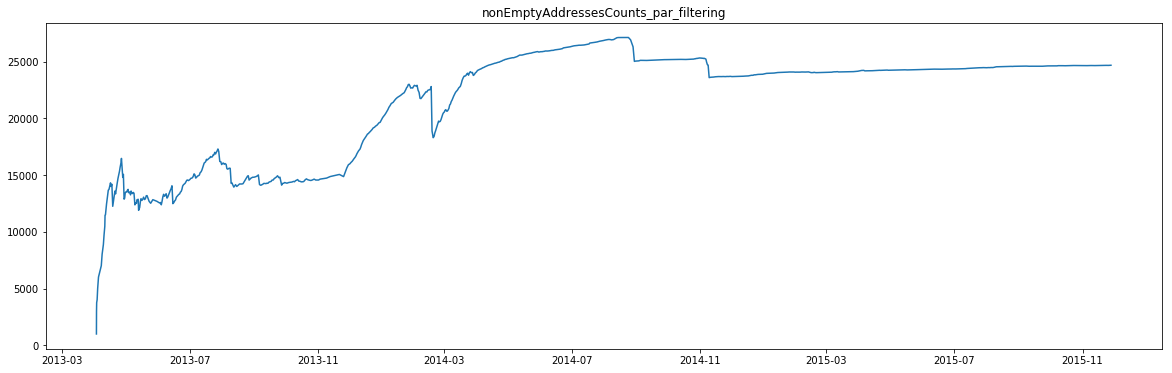

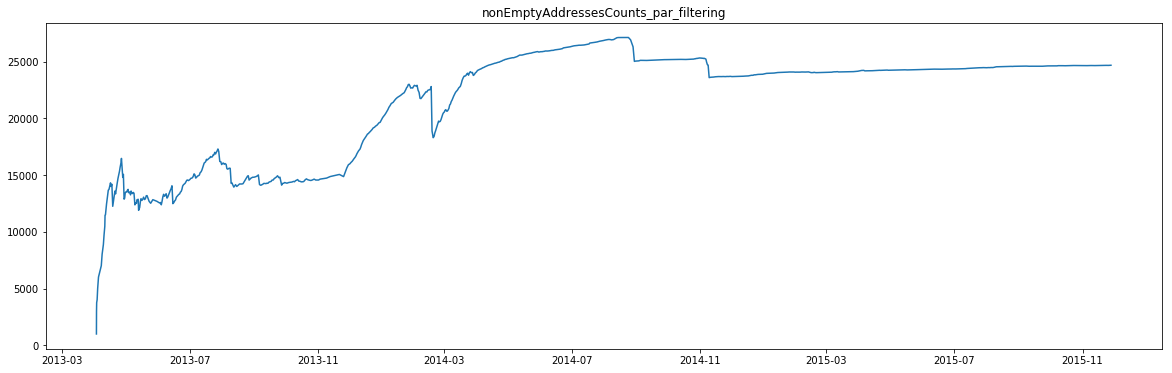

In [27]:
_ = MNC.drawGraph({S_NONEMPTY_ADDS: 'par_filtering'})

In [8]:
MNC[S_MAP_A2C].readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks' with prefix 'int1000b_map_address2cluster'...
  Got 'int1000b_map_address2cluster_np.hdf5', key is 'np'
Finish


In [9]:
MNC.getNonEmptyClustersCounts('par', filtering=True)

Work time 16.18s


In [10]:
MNC.getNonEmptyClustersCounts('nonPar', filtering=True)

Work time 31.91s


In [11]:
MNC[S_NONEMPTY_CLS]['par_filteringUnspents'] == MNC[S_NONEMPTY_CLS]['nonPar_filteringUnspents'] 

True

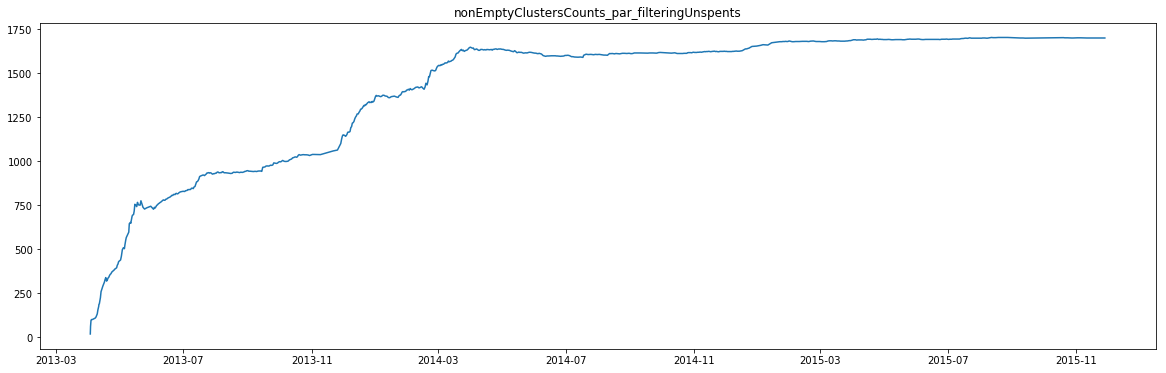

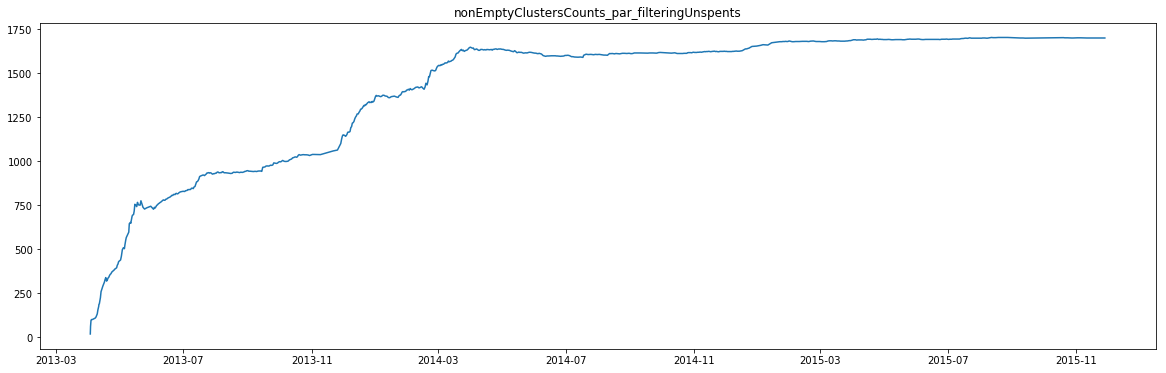

In [21]:
MNC.drawGraph({S_NONEMPTY_CLS:'par_filteringUnspents'})

In [30]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [32]:
BTC[S_GINIS].readAll()
BTC[S_REL_FLOWS].readAll()
BTC[S_FEES].readAll()
BTC[S_NCS].readAll()
BTC[S_UNSPENTS].readAll()
BTC[S_NONEMPTY_CLS].readAll()
BTC[S_CLS_CNTS].readAll()
BTC.prices.readAll()

Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_ginisOfClustersWealth'...
  Got 'int1000b_ginisOfClustersWealth_need2recalculateWOnulldata.json', key is 'need2recalculateWOnulldata'
  Got 'int1000b_ginisOfClustersWealth_WOnuldata.json', key is 'WOnuldata'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_relativeFlowVolumes'...
  Got 'int1000b_relativeFlowVolumes_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_fees'...
  Got 'int1000b_fees_nonPar.json', key is 'nonPar'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_NacamotoCoefs'...
  Got 'int1000b_NacamotoCoefs.json', key is ''
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_unspents'...
  Got 'int1000b_unspents_par.json', key is 'par'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with

In [33]:
tag_b = BTC.gatherAllMetrics({S_NCS:'', S_GINIS:'WOnuldata', S_REL_FLOWS:'nonPar', S_FEES:'nonPar',
                                   S_NONEMPTY_CLS:'nonPar', S_UNSPENTS:'par', S_CLS_CNTS: ''})
tag_filtered_b = BTC.rollingMeanAllMetrics(allMetrics_tag=tag_b, common_win=5)

Gathered under tag 'nonEmptyClustersCounts=nonPar_unspents=par_NacamotoCoefs=_relativeFlowVolumes=nonPar_activeClustersCounts=_ginisOfClustersWealth=WOnuldata_fees=nonPar'


/home/ubuntu/thesis_work/my_tools.py:811: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=True,window=5).mean()
  col_after_rolling = pd.rolling_mean(pd_df[col], window=window, center=True)


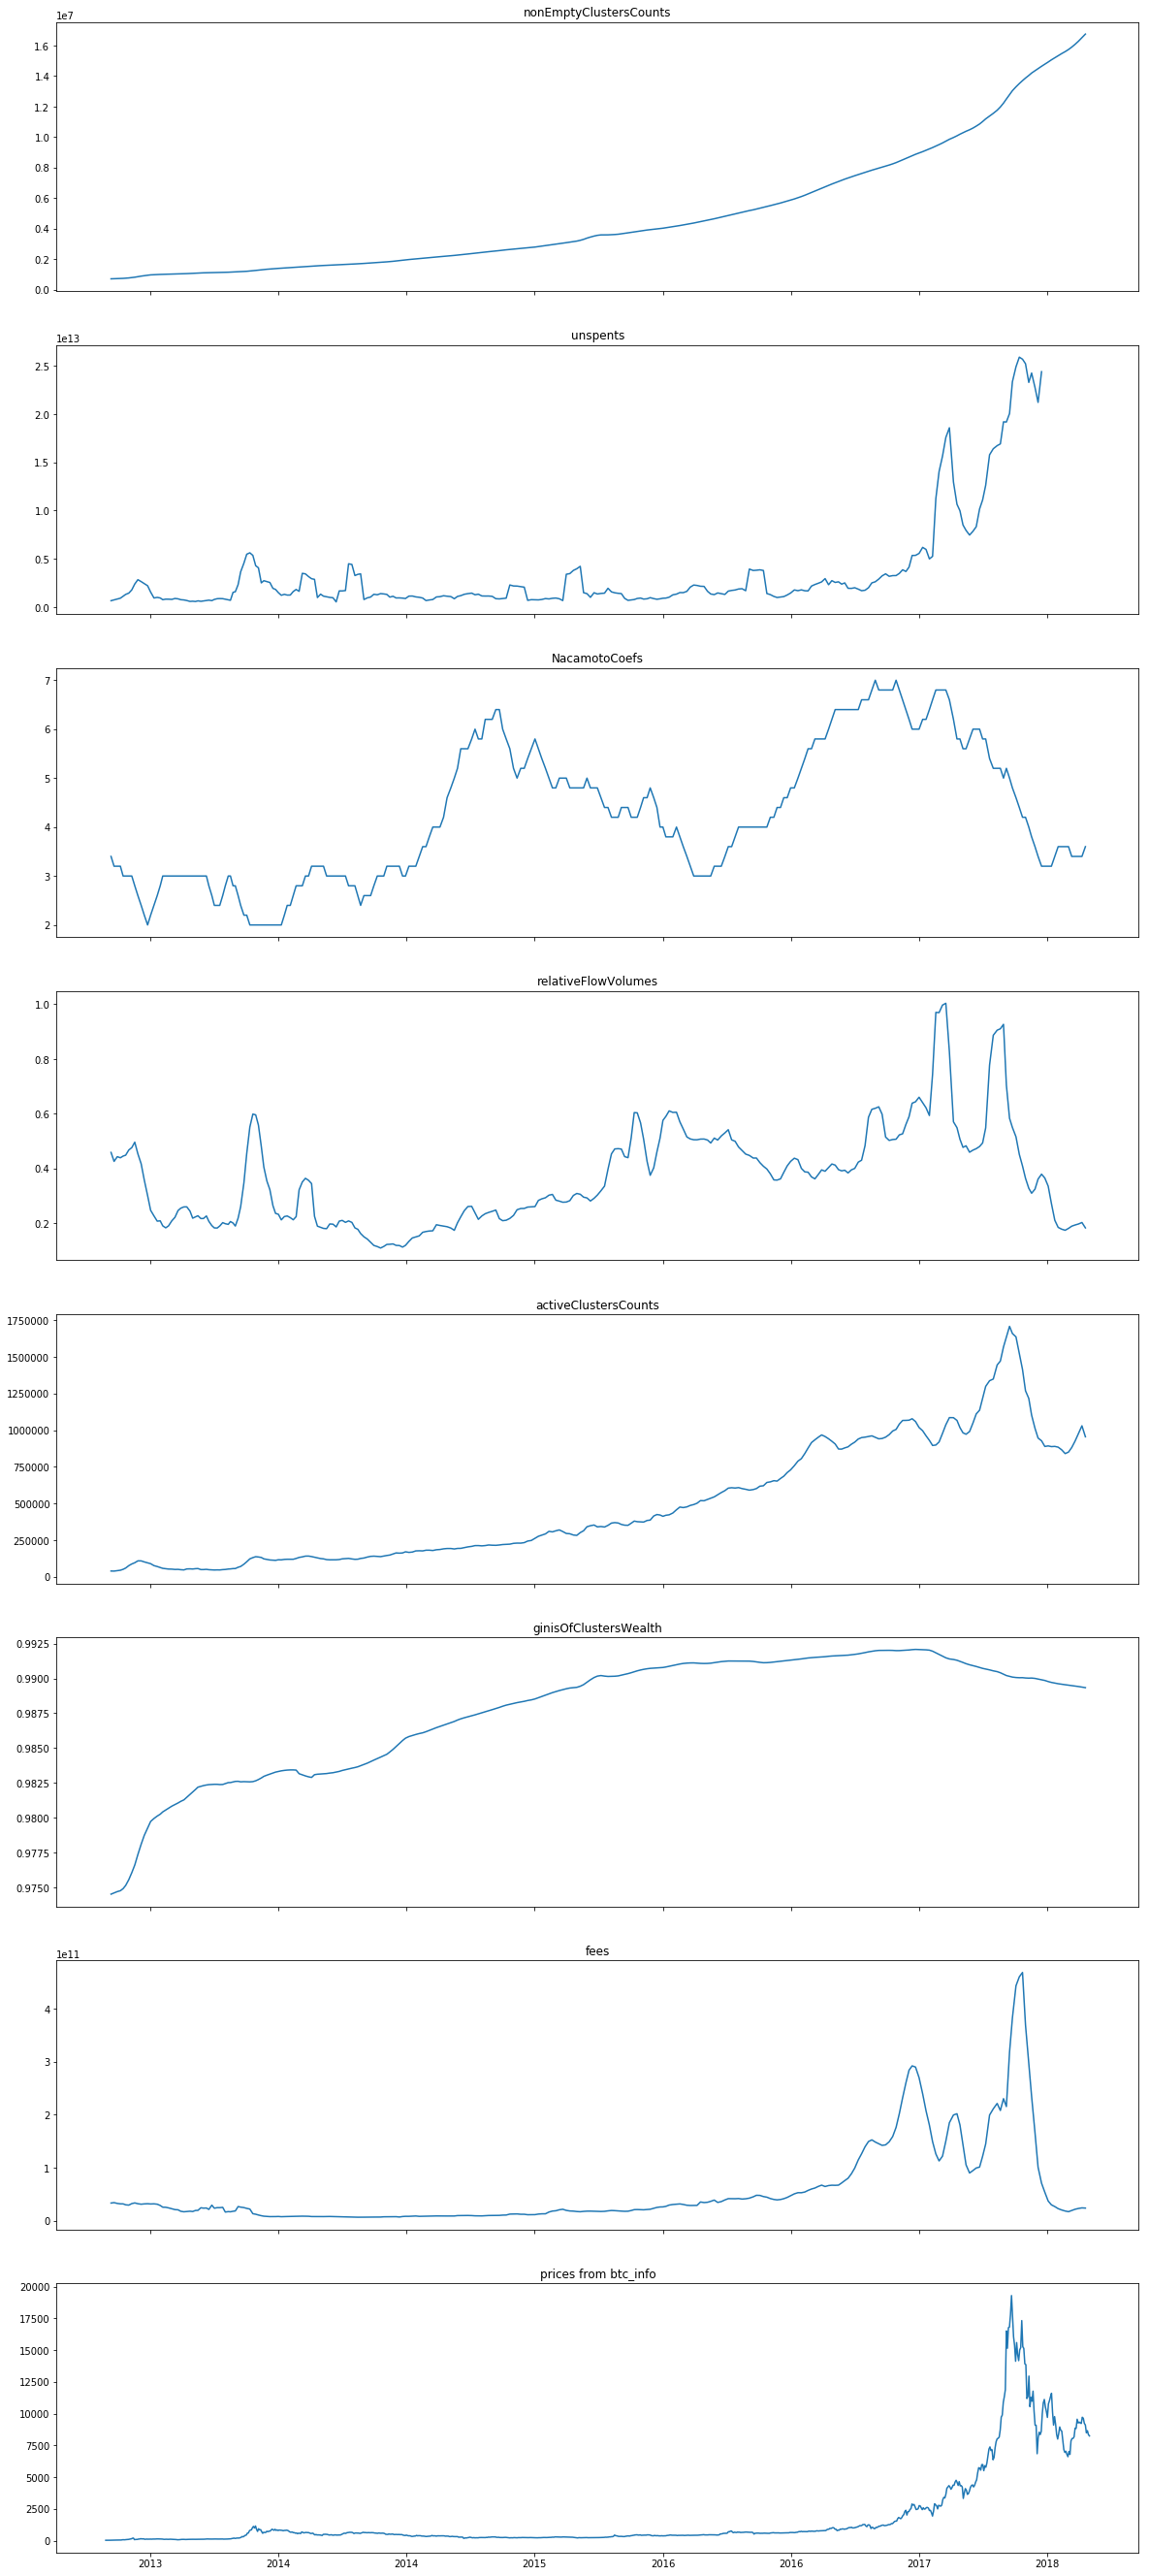

In [40]:
_b = BTC.drawGraph(allMetrics_tag=tag_filtered_b, prices_key='btc_info', begin=220)

In [37]:
BTC.allMetrics.save(tag_filtered_b, check=False)

Saving "nonEmptyClustersCounts=nonPar_unspents=par_NacamotoCoefs=_relativeFlowVolumes=nonPar_activeClustersCounts=_ginisOfClustersWealth=WOnuldata_fees=nonPar_rolledMeanComWnd=5" version in "/home/ubuntu/thesis_work/calculated/bitcoin/int1000b_allMetrics_nonEmptyClustersCounts=nonPar_unspents=par_NacamotoCoefs=_relativeFlowVolumes=nonPar_activeClustersCounts=_ginisOfClustersWealth=WOnuldata_fees=nonPar_rolledMeanComWnd=5" file


In [38]:
_b.savefig('bitcoin_allMetrics_meanWnd5.png')

In [41]:
_b.savefig('bitcoin_from220k_allMetrics_meanWnd5.png')

In [9]:
MNC.blocks[300000:300100].bits

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [41]:
prices_l_df = pd.read_csv('~/thesis_work/downloaded/ltc-usd-max.csv')
prices_l_np = np.array(prices_l_df['price'])
prices_l_df[-1:]

,snapped_at,price,market_cap,total_volume
1859,2018-06-02 00:00:00 UTC,118.906885,6.753090e+09,2.209496e+08


In [42]:
prices_b_df = pd.read_csv('~/thesis_work/downloaded/btc-usd-max.csv')
prices_b_np = np.array(prices_b_df['price'])
prices_b_df[-1:]

,snapped_at,price,market_cap,total_volume
1859,2018-06-02 00:00:00 UTC,7487.076305,1.277976e+11,1.637954e+09


In [71]:
def ltc_in_btc(shift=0, ltc=prices_l_np, btc=prices_b_np):  
    if shift == 0:
        return ltc / btc
    else:
        return ltc[:-shift] / btc[shift:]

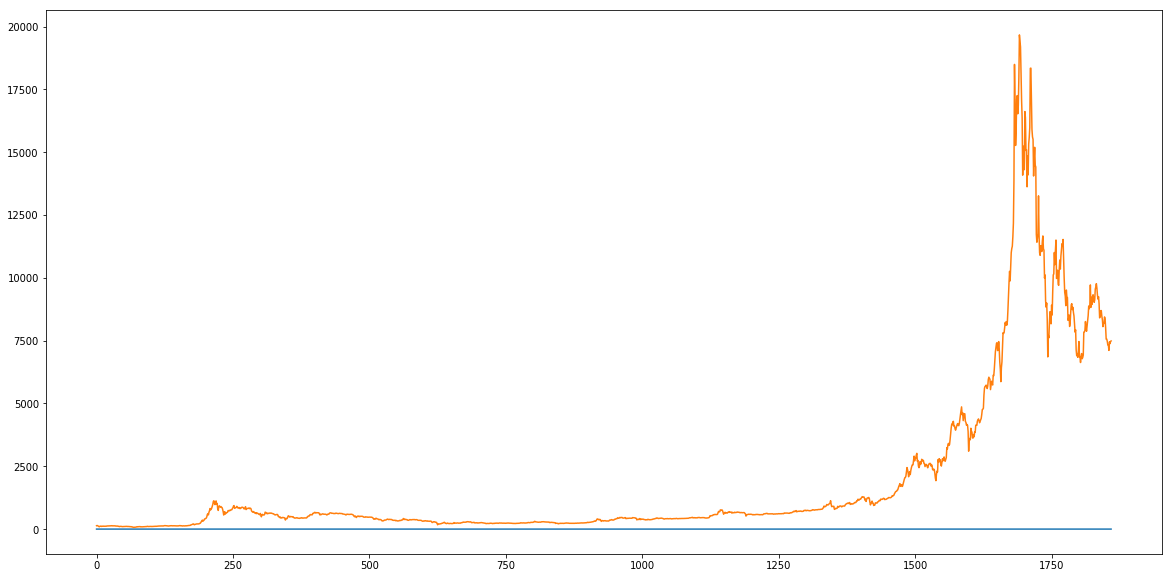

In [68]:
shift = 0

plt.figure(figsize=(20, 10))
plt.plot(runningMean(ltc_in_btc(0), 1))
plt.plot(prices_b_np)

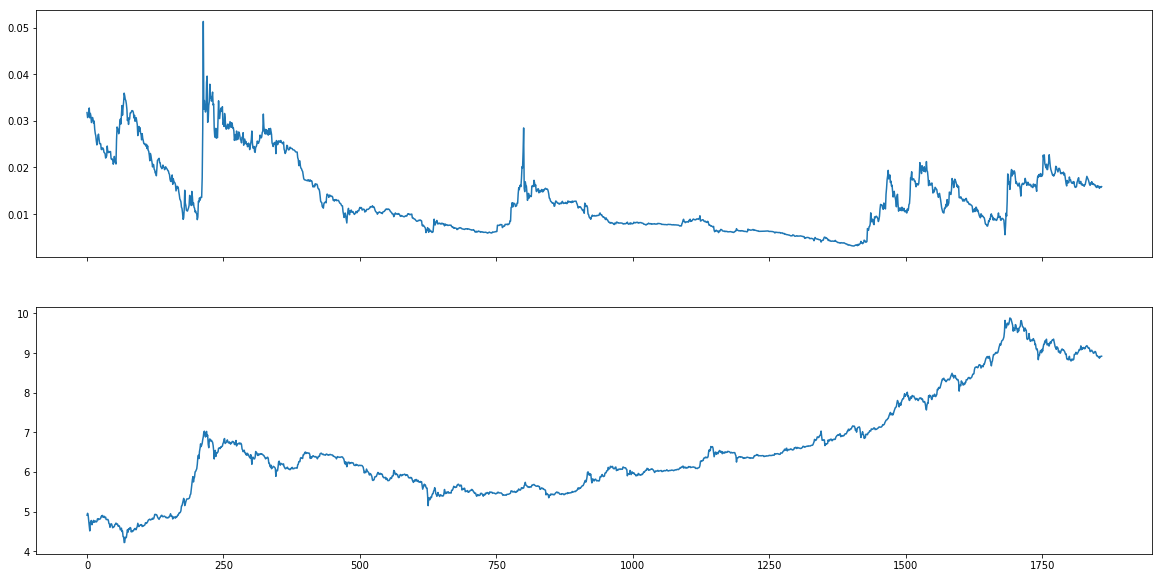

In [73]:
f = plt.figure(figsize=(20, 10))
axes = f.subplots(2, 1, sharex=True, squeeze=False)
axes[0, 0].plot(ltc_in_btc())
axes[1, 0].plot(np.log(prices_b_np))

In [53]:
a == runningMean(a, 1)

array([ True,  True,  True], dtype=bool)

In [59]:
def prices_corrcoef(mean_wnd=1, shift=0):
    if shift == 0:
        ltc = list(runningMean(prices_l_np, mean_wnd))
        btc = list(runningMean(prices_b_np, mean_wnd))
    else:
        ltc = list(runningMean(prices_l_np, mean_wnd)[:-shift])
        btc = list(runningMean(prices_b_np, mean_wnd)[shift:])
    return np.corrcoef(np.array([ltc, btc]))

In [66]:
prices_corrcoef(10, 0)

array([[ 1.        ,  0.96971107],
       [ 0.96971107,  1.        ]])

In [7]:
MNC.times[0]

datetime.datetime(2013, 4, 3, 1, 27, 49)

In [59]:
prices_df = MNC.prices['coingecko']
needed_times = [pd.to_datetime(t.date()) for t in MNC.times]
sync_prices_df = prices_df[pd.to_datetime(prices_df['times']).isin(needed_times)]
sync_prices = list(sync_prices_df['prices'])
sync_prices_with_nones = [None,] * (len(MNC.times) - len(sync_prices)) + sync_prices

In [60]:
MNC[S_SYNC_PRICES].v['c_byDay'] = sync_prices_with_nones
MNC[S_SYNC_PRICES].save('c_byDay')

Saving "c_byDay" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_synchronizedPrices_c_byDay" file


In [61]:
MNC[S_SYNC_PRICES].save('c_byDay')

Saving "c_byDay" version in "/home/ubuntu/thesis_work/calculated/mincoin_first_800k_blocks/int1000b_synchronizedPrices_c_byDay" file


In [62]:
sync_prices_with_nones[-5:]

[0.00160629458,
 0.00164491,
 0.0017171009,
 0.0017017121399999998,
 0.0016385751999999998]

In [63]:
sync_prices_df[-5:]

,prices,times
891,0.001606,2015-11-24 00:00:00
892,0.001645,2015-11-25 00:00:00
893,0.001717,2015-11-26 00:00:00
894,0.001702,2015-11-27 00:00:00
895,0.001639,2015-11-28 00:00:00


In [64]:
MNC.times[-5:]

[datetime.datetime(2015, 11, 24, 17, 21, 50),
 datetime.datetime(2015, 11, 25, 18, 4, 34),
 datetime.datetime(2015, 11, 26, 13, 40, 28),
 datetime.datetime(2015, 11, 27, 8, 58, 19),
 datetime.datetime(2015, 11, 28, 4, 16, 34)]

In [10]:
MNC.prices['coingecko'][:3]

,prices,times
0,0.099005,2013-05-03 00:00:00
1,0.193906,2013-05-04 00:00:00
2,0.118000,2013-05-05 00:00:00


In [18]:
pd.to_datetime(MNC.times[0].date())

Timestamp('2013-04-03 00:00:00')

In [24]:
pd.to_datetime(MNC.prices['coingecko']['times'][:2])

0   2013-05-03
1   2013-05-04
Name: times, dtype: datetime64[ns]

In [7]:
# Q_LITECOIN
LTC = CoinDataMgr(blocksci_path="/home/ubuntu/litecoin_disk3",
                  path_to_clusters="/home/ubuntu/~/clusters_l2",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/litecoin")

Got 1421537 blocks
Got 9312234 clusters


In [8]:
# Q_BITCOIN
BTC = CoinDataMgr(blocksci_path="/home/ubuntu/bitcoin",
                  path_to_clusters="/home/ubuntu/~/clusters_b",
                  folder_with_calculated="/home/ubuntu/thesis_work/calculated/bitcoin")

Got 523426 blocks
Got 206433637 clusters


In [9]:
LTC.prices.readAll()
BTC.prices.readAll()
ltc_prices = LTC.prices['coingecko']
btc_prices = BTC.prices['coingecko']

Reading folder '/home/ubuntu/thesis_work/calculated/litecoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish
Reading folder '/home/ubuntu/thesis_work/calculated/bitcoin' with prefix 'int1000b_prices'...
  Got 'int1000b_prices_btc_info.csv', key is 'btc_info'
  Got 'int1000b_prices_coingecko.csv', key is 'coingecko'
Finish


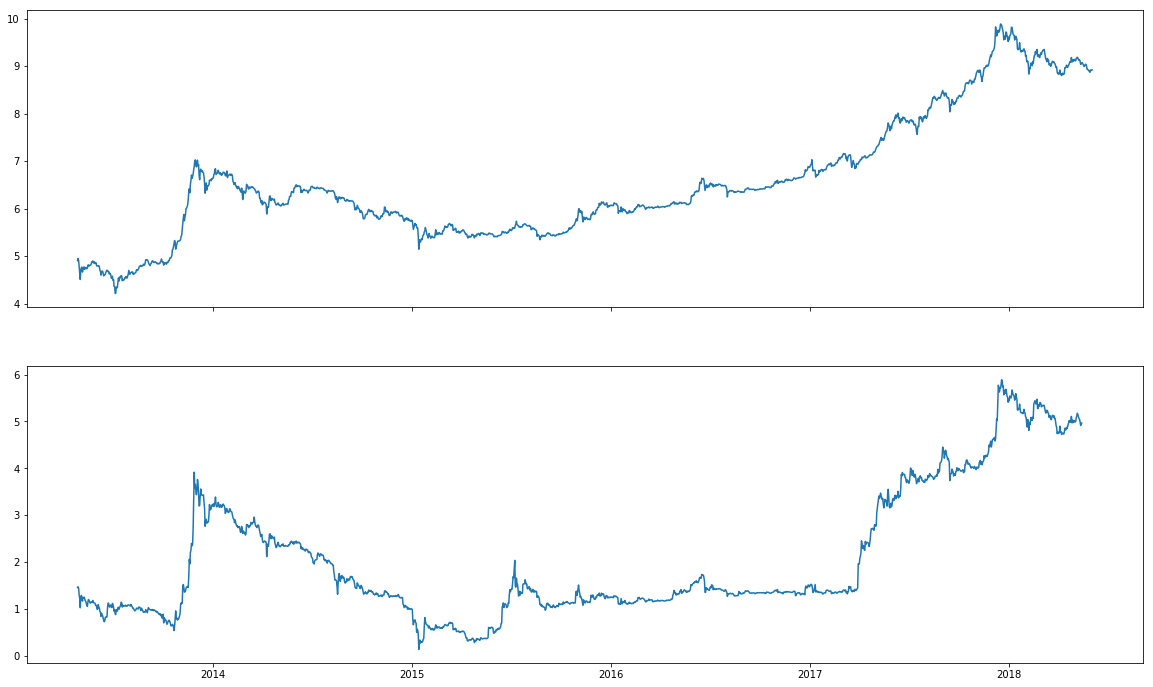

In [18]:
f = plt.figure(figsize=(20, 12))
axes = f.subplots(2, 1, sharex=True)
#begin = 0, end = 
axes[0].plot(pd.to_datetime(btc_prices['times']), np.log(btc_prices['prices']))
axes[1].plot(pd.to_datetime(ltc_prices['times']), np.log(ltc_prices['prices']))

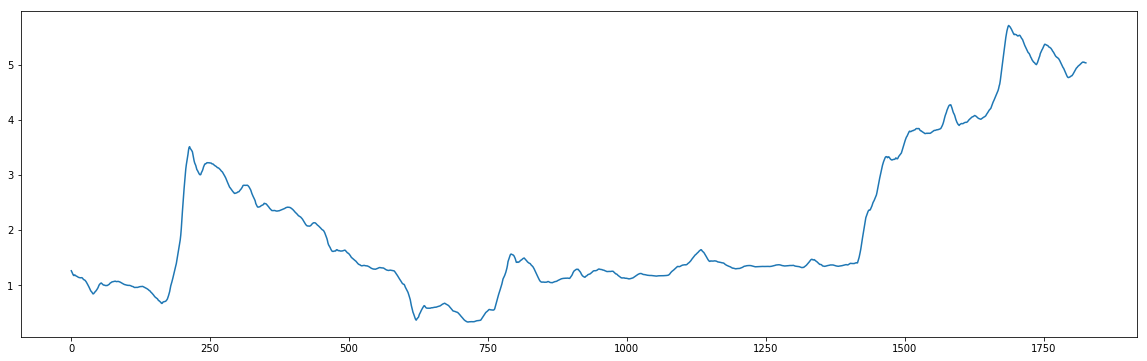

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(runningMean(np.log(ltc_prices['prices']).values, 15))

In [ ]:

axes[1].plot(ltc_prices['times'], np.log(btc_prices['prices'][:1841]))

In [6]:
len(ltc_prices)

1841

In [7]:
len(btc_prices)

1860

In [11]:
ltc_prices[-5:]

,prices,times
1836,155.176824,2018-05-10 00:00:00 UTC
1837,146.708663,2018-05-11 00:00:00 UTC
1838,135.884238,2018-05-12 00:00:00 UTC
1839,141.335809,2018-05-13 00:00:00 UTC
1840,143.388732,2018-05-14 00:00:00 UTC


In [13]:
btc_prices[1836:1841]

,prices,times
1836,9248.960396,2018-05-10 00:00:00
1837,8969.940376,2018-05-11 00:00:00
1838,8405.560563,2018-05-12 00:00:00
1839,8480.580376,2018-05-13 00:00:00
1840,8683.986203,2018-05-14 00:00:00


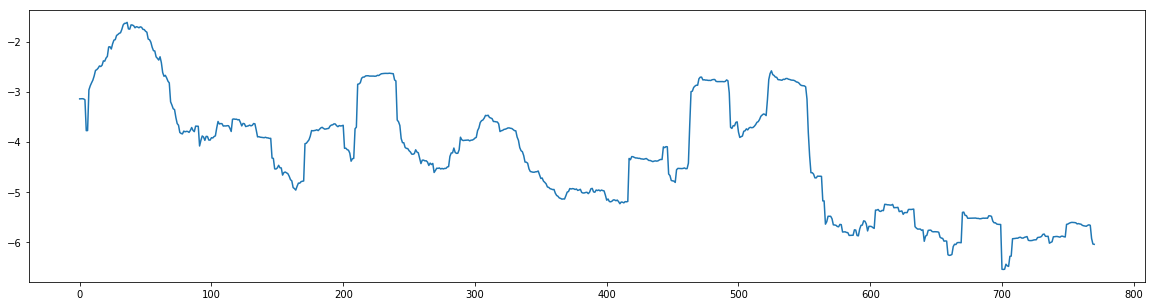

In [35]:
meaned_relflows = runningMean(MNC[S_REL_FLOWS]['par'], 30)
plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.set_ylim(top=0.03)
ax.plot(np.log(meaned_relflows))

In [34]:
np.log(meaned_relflows)

array([-3.14435393, -3.14291674, -3.14094715, -3.14532752, -3.16249583,
       -3.77889828, -3.77706534, -2.96626241, -2.88558087, -2.82552642,
       -2.77111764, -2.68752042, -2.57760198, -2.56123532, -2.53164555,
       -2.4881239 , -2.49904578, -2.47299012, -2.38667131, -2.3926155 ,
       -2.33068303, -2.29704901, -2.10907713, -2.10428185, -2.14951196,
       -2.04456611, -1.97200453, -1.96289375, -1.87968487, -1.86053513,
       -1.83675563, -1.82552802, -1.75788444, -1.66936842, -1.63817412,
       -1.6366751 , -1.61779669, -1.74866823, -1.75321351, -1.66818342,
       -1.67128009, -1.68589157, -1.72598462, -1.70430825, -1.71146434,
       -1.72604295, -1.70710821, -1.71674546, -1.7571553 , -1.76234827,
       -1.79489655, -1.8144181 , -1.95065654, -1.96420898, -2.01290549,
       -2.11312203, -2.1829807 , -2.18880845, -2.30596949, -2.33585896,
       -2.37030707, -2.30451942, -2.42298393, -2.61947437, -2.69402595,
       -2.67496983, -2.72610655, -2.79111474, -2.82600187, -3.20